# Assignment1

### 3.1 Pseudonymisation

Imports

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from anonymizedf.anonymizedf import anonymize

Import the data

In [128]:
df = pd.read_csv(r"athletes.csv")

/var/folders/lt/x1xcmh9n5xz2fgqn5y9_3kf40000gn/T/ipykernel_57995/3087902215.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"athletes.csv")


Remove rows with more than 5 NaN

In [129]:
df=df.dropna(thresh=23)


Display

In [130]:
display(df)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
12,11416.0,Mike Abgarian,NaN,NaN,NaN,Male,31.0,65.0,150.0,119.0,...,465.0,405.0,81.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a week|,2-4 years|,NaN
20,21053.0,Douglas Acker,North East,CrossFit South Shore LI,Crossfit South Shore L.I.,Male,42.0,72.0,210.0,198.0,...,515.0,505.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,4+ years|,NaN
21,21269.0,Erik Acevedo,Southern California,CrossFit Training Yard,CrossFit Training Yard,Male,30.0,71.0,200.0,243.0,...,385.0,315.0,35.0,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|,NaN
22,21685.0,Richard Ablett,Africa,Cape CrossFit Wolfpack,Cape CrossFit,Male,28.0,70.0,176.0,720.0,...,335.0,254.0,27.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695.0,Carley Feil,Northern California,CrossFit Combat Fitness,CrossFit Combat Fitness,Female,20.0,67.0,140.0,NaN,...,209.0,180.0,7.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,Less than 6 months|,2015-03-25 09:49:19
422421,385519.0,Dru Miller,South East,CrossFit Resurgens,CrossFit Resurgens at Powers Ferry,Male,28.0,70.0,180.0,NaN,...,365.0,285.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,2015-03-25 09:50:25
422518,92194.0,Robert North,North East,BayState CrossFit,BayState CrossFit,Male,40.0,70.0,175.0,479.0,...,275.0,255.0,35.0,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|,I played college sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,NaN,2015-03-25 09:51:11
422754,539852.0,Ted Worden,South East,Black Box Strong,CrossFit Black Box,Male,27.0,69.0,175.0,399.0,...,385.0,265.0,NaN,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I rec...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,6-12 months|,2015-03-25 09:53:04


In [131]:
df.apply(pd.Series.nunique)

athlete_id            21747
name                  21409
region                   17
team                   3787
affiliate              5921
gender                    2
age                      43
height                   58
weight                  248
fran                    821
helen                   847
grace                   714
filthy50               1767
fgonebad                474
run400                  259
run5k                  1299
candj                   323
snatch                  286
deadlift                431
backsq                  404
pullups                 128
eat                      40
train                    74
background               38
experience               68
schedule                117
howlong                  25
retrieved_datetime    16597
dtype: int64

Text(0.5, 1.0, 'Cardinality')

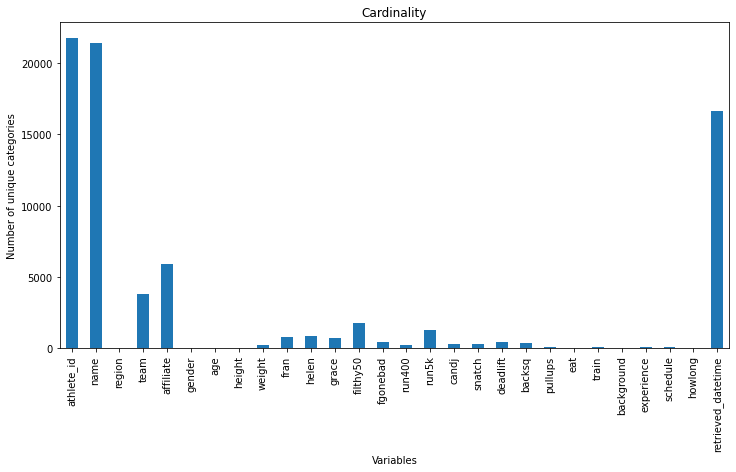

In [132]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

### explicit personally identifiable information
are name and athlete_id attributes have the highest number of unique values so high cardinality <br> 
These values enable a one-to-one mapping to an individual

 Prepare the data to be anonymized

In [133]:
an = anonymize(df)

display name column and corresponding fake name column

In [134]:
an.fake_names("name")
df[['name', 'Fake_name']]

,name,Fake_name
3,Abo Brandon,Rachael Barnes-Marsh
12,Mike Abgarian,Derek Richardson-Moore
20,Douglas Acker,Trevor Lawrence
21,Erik Acevedo,Patricia Roberts
22,Richard Ablett,Dr Denis Harvey
...,...,...
422278,Carley Feil,Miss Abigail Burns
422421,Dru Miller,Janice Patel
422518,Robert North,Charles Storey
422754,Ted Worden,Marc Barton


display name athlete_id and corresponding fake id column

In [135]:
df['athlete_id'] = df['athlete_id'].astype('string').str.split('.').str[0]
an.fake_ids("athlete_id")
df[['athlete_id', 'Fake_athlete_id']]

,athlete_id,Fake_athlete_id
3,5164,NGSV07507937404825
12,11416,URVT47443834718088
20,21053,TGRV70941646571661
21,21269,EWPA33547423535354
22,21685,SSFG91220139261489
...,...,...
422278,553695,UZOQ77450953288955
422421,385519,QYUU09834760745461
422518,92194,BPYF14533391372323
422754,539852,QQPN68004029943179


### 3.2 Randomisation

In [136]:
from faker import Faker

#### Generate two lists of meaningful names for first and last names

Functions to generate names

Generate 21747(size of data set) random unique first and last names

In [137]:
fake = Faker()

first_names = set()
last_names = set()
while len(first_names) < 690 and len(last_names) < 1000:
    first_names.add(fake.first_name())
    last_names.add(fake.last_name())

first_names_list=list(first_names)
last_names_list=list(last_names)


generate a random name combination

In [138]:
def generate_random_name():
    return f"{random.choice(first_names_list)} {random.choice(last_names_list)}"

In [139]:
num_unique_names = 21747  

random_names = set()
while len(random_names) < num_unique_names:
    random_names.add(generate_random_name())

display

In [140]:
random_names

{'Lindsay Kidd',
 'Jared Trujillo',
 'Nancy Joseph',
 'Doris Duke',
 'Pamela Baldwin',
 'Bonnie Ewing',
 'Angel Cantrell',
 'Bruce Graham',
 'Howard Lucero',
 'Carla Soto',
 'Wyatt Mcintosh',
 'Jeff Stanton',
 'Kari English',
 'Nancy Booker',
 'Lori Davis',
 'Derek Patton',
 'Vickie Sandoval',
 'Kristina Pineda',
 'Norma Cole',
 'Eddie Bishop',
 'Connor Patel',
 'Gabriel Mclaughlin',
 'Jaclyn Mcgee',
 'Fred Pearson',
 'Denise Goodwin',
 'Evan Singleton',
 'Tara Vang',
 'Thomas Benjamin',
 'Elaine Short',
 'Sonya Wang',
 'Mario Conner',
 'Kristin Donovan',
 'Ariel Mueller',
 'Alec Dean',
 'Dominic Foster',
 'Glenn Kaiser',
 'Wesley Mccormick',
 'Patty Wade',
 'Peggy Irwin',
 'Beverly Sweeney',
 'Katelyn Grimes',
 'Vicki Zhang',
 'Alexandria Wolfe',
 'Chloe Benton',
 'Shirley Mcgrath',
 'Kevin Conrad',
 'Ross Livingston',
 'Kurt Baker',
 'Holly Brown',
 'Duane Tucker',
 'Heidi Hoover',
 'Catherine Byrd',
 'Abigail Beltran',
 'Kelli Harrison',
 'Vicki Patel',
 'Damon Chang',
 'Vincent Sch

generate lookup table

In [141]:
lookup = pd.DataFrame({"original_name": df['name'], 
                    "random_name": list(random_names)}) 

lookup_table=dict(zip(lookup['random_name'], lookup['original_name']))


display(lookup_table)

{'Lindsay Kidd': 'Abo Brandon',
 'Jared Trujillo': 'Mike Abgarian',
 'Nancy Joseph': 'Douglas Acker',
 'Doris Duke': 'Erik Acevedo',
 'Pamela Baldwin': 'Richard Ablett',
 'Bonnie Ewing': 'Joe Abruzzo',
 'Angel Cantrell': 'Jerry Abadom',
 'Bruce Graham': 'Brigham Abbott',
 'Howard Lucero': 'Colton Achtenberg',
 'Carla Soto': 'Bill Adams',
 'Wyatt Mcintosh': 'Justin Adams',
 'Jeff Stanton': 'Chris Ackley',
 'Kari English': 'Daniel Adamson',
 'Nancy Booker': 'Bryan Acosta',
 'Lori Davis': 'Landon Adams',
 'Derek Patton': 'Steven Lee Adams',
 'Vickie Sandoval': 'Lorin Adams',
 'Kristina Pineda': 'jaime acuna',
 'Norma Cole': 'Jason Adams',
 'Eddie Bishop': 'Stacey Adams',
 'Connor Patel': 'Craig Adams',
 'Gabriel Mclaughlin': 'David Ackland',
 'Jaclyn Mcgee': 'Jan-Ronald Agay',
 'Fred Pearson': 'John Aguilar',
 'Denise Goodwin': 'Shaun Adkins',
 'Evan Singleton': 'Christian Aguirre',
 'Tara Vang': 'Rolf Adelsberger',
 'Thomas Benjamin': 'Frederik Aegidius',
 'Elaine Short': 'Tim Adkins',
 

replace real names with random ones

In [142]:
df['name']=lookup['random_name']
display(df)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime,Fake_name,Fake_athlete_id
3,5164,Lindsay Kidd,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN,Rachael Barnes-Marsh,NGSV07507937404825
12,11416,Jared Trujillo,NaN,NaN,NaN,Male,31.0,65.0,150.0,119.0,...,81.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a week|,2-4 years|,NaN,Derek Richardson-Moore,URVT47443834718088
20,21053,Nancy Joseph,North East,CrossFit South Shore LI,Crossfit South Shore L.I.,Male,42.0,72.0,210.0,198.0,...,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,4+ years|,NaN,Trevor Lawrence,TGRV70941646571661
21,21269,Doris Duke,Southern California,CrossFit Training Yard,CrossFit Training Yard,Male,30.0,71.0,200.0,243.0,...,35.0,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|,NaN,Patricia Roberts,EWPA33547423535354
22,21685,Pamela Baldwin,Africa,Cape CrossFit Wolfpack,Cape CrossFit,Male,28.0,70.0,176.0,720.0,...,27.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|,NaN,Dr Denis Harvey,SSFG91220139261489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Tina Lambert,Northern California,CrossFit Combat Fitness,CrossFit Combat Fitness,Female,20.0,67.0,140.0,NaN,...,7.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,Less than 6 months|,2015-03-25 09:49:19,Miss Abigail Burns,UZOQ77450953288955
422421,385519,Jordan Fowler,South East,CrossFit Resurgens,CrossFit Resurgens at Powers Ferry,Male,28.0,70.0,180.0,NaN,...,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,2015-03-25 09:50:25,Janice Patel,QYUU09834760745461
422518,92194,Gail Gay,North East,BayState CrossFit,BayState CrossFit,Male,40.0,70.0,175.0,479.0,...,35.0,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|,I played college sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,NaN,2015-03-25 09:51:11,Charles Storey,BPYF14533391372323
422754,539852,Chad Walls,South East,Black Box Strong,CrossFit Black Box,Male,27.0,69.0,175.0,399.0,...,NaN,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I rec...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,6-12 months|,2015-03-25 09:53:04,Marc Barton,QQPN68004029943179


try getting the original name from lookup table

In [143]:
lookup_table.get('Curtis Mayer')

### 3.3 Aggregation 

minimum age present is 14 and maximum 56

In [144]:
age_labels = ['10-20', '21-31', '32-42', '43-53', '54-64']
age_bins = [10, 20, 31, 42, 53,64]

In [145]:
df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

display(df)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime,Fake_name,Fake_athlete_id
3,5164,Lindsay Kidd,Southern California,LAX CrossFit,LAX CrossFit,Male,32-42,67.0,NaN,211.0,...,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN,Rachael Barnes-Marsh,NGSV07507937404825
12,11416,Jared Trujillo,NaN,NaN,NaN,Male,32-42,65.0,150.0,119.0,...,81.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a week|,2-4 years|,NaN,Derek Richardson-Moore,URVT47443834718088
20,21053,Nancy Joseph,North East,CrossFit South Shore LI,Crossfit South Shore L.I.,Male,43-53,72.0,210.0,198.0,...,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,4+ years|,NaN,Trevor Lawrence,TGRV70941646571661
21,21269,Doris Duke,Southern California,CrossFit Training Yard,CrossFit Training Yard,Male,21-31,71.0,200.0,243.0,...,35.0,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|I inc...,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|,NaN,Patricia Roberts,EWPA33547423535354
22,21685,Pamela Baldwin,Africa,Cape CrossFit Wolfpack,Cape CrossFit,Male,21-31,70.0,176.0,720.0,...,27.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|,NaN,Dr Denis Harvey,SSFG91220139261489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Tina Lambert,Northern California,CrossFit Combat Fitness,CrossFit Combat Fitness,Female,21-31,67.0,140.0,NaN,...,7.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,Less than 6 months|,2015-03-25 09:49:19,Miss Abigail Burns,UZOQ77450953288955
422421,385519,Jordan Fowler,South East,CrossFit Resurgens,CrossFit Resurgens at Powers Ferry,Male,21-31,70.0,180.0,NaN,...,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,2-4 years|,2015-03-25 09:50:25,Janice Patel,QYUU09834760745461
422518,92194,Gail Gay,North East,BayState CrossFit,BayState CrossFit,Male,32-42,70.0,175.0,479.0,...,35.0,I eat whatever is convenient|,I workout mostly at a CrossFit Affiliate|,I played college sports|,I began CrossFit with a coach (e.g. at an affi...,NaN,NaN,2015-03-25 09:51:11,Charles Storey,BPYF14533391372323
422754,539852,Chad Walls,South East,Black Box Strong,CrossFit Black Box,Male,21-31,69.0,175.0,399.0,...,NaN,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I rec...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,6-12 months|,2015-03-25 09:53:04,Marc Barton,QQPN68004029943179
